In [202]:
import numpy as np
import pandas as pd
#import scipy.stats as stats
#import statsmodels.stats.api as sms
#import matplotlib as mpl
#import matplotlib.pyplot as plt
#import seaborn as sns
import json
#from math import ceil
#from collections import Counter
# %matplotlib inline

#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn.preprocessing import OrdinalEncoder, PowerTransformer, StandardScaler, MinMaxScaler

In [203]:
#dfus = pd.read_csv("USvideos.csv")

### LOAD MAIN DATA

In [253]:
dfus = pd.read_csv("data_tableau.csv")

In [254]:
dfus["category_id"].isna().sum()
dfus.shape
dfus.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'description', 'Country'],
      dtype='object')

In [255]:
dfus["tags"].head(3)

0    Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...
1    plush|"bad unboxing"|"unboxing"|"fan mail"|"id...
2    racist superman|"rudy"|"mancuso"|"king"|"bach"...
Name: tags, dtype: object

### CLEAN MAIN DATA

In [258]:
dfus=dfus.iloc[dfus["category_id"].dropna().index].reset_index(drop=True)

In [262]:
dfus.isna().sum()
dfus.shape

(222833, 14)

In [266]:
dfus['tags'] = dfus['tags'].str.replace('"','')

In [267]:
dfus.columns
dfus["category_id"] = dfus["category_id"].round(0).astype(int)

In [268]:
dfus["Country_Category"] = dfus['Country'] + " " + dfus['category_id'].astype(str)
dfus.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,description,Country,Country_Category
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,Eminem|Walk|On|Water|Aftermath/Shady/Interscop...,17158579.0,787425.0,43420.0,125882.0,Eminem's new track Walk on Water ft. Beyoncé i...,Canada,Canada 10
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,plush|bad unboxing|unboxing|fan mail|idubbbztv...,1014651.0,127794.0,1688.0,13030.0,STill got a lot of packages. Probably will las...,Canada,Canada 23
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,racist superman|rudy|mancuso|king|bach|racist|...,3191434.0,146035.0,5339.0,8181.0,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Canada,Canada 23


### LOAD CATEGORY DATA

In [269]:
fileNames = ['US_category_id.json', 
             'CA_category_id.json', 
             'JP_category_id.json', 
             'DE_category_id.json',
             'FR_category_id.json',
             'GB_category_id.json']

df.head(3)
df["items"][0]["snippet"]["title"]
#df["items"][0]["snippet"]["Country"]
#df.head(3)
len(df)
df.head(3)
df["items"]
df["items"][1]["id"]

In [270]:
dfMergedCategories = pd.DataFrame()
rowNumber = 0

for i in fileNames:
    df = pd.read_json(i)
    countryID = i[:2]
    for j in range(0, len(df)):
        newRow = pd.DataFrame({"Country": [countryID], 
                              "Category_id": [df["items"][j]["id"]],
                            "Category_Name": [df["items"][j]["snippet"]["title"]],
                              })
        # print(newRow)
        # dfMerged.append(newRow)
        if rowNumber == 0:
            dfMergedCategories = newRow
        else:
            dfMergedCategories = pd.concat([dfMergedCategories, newRow], axis=0) # ignore_index=True)
        #dfMerged = pd.concat([dfMerged, pd.DataFrame([newRow])], ignore_index=True)
        # print(newRow)
        #dfMerged.append(newRow)
        rowNumber += 1
        
#pd.DataFrame(dfMerged.reshape(2, -1), columns=cols)


In [271]:
newRow.shape
type(newRow)
dfMergedCategories.reset_index(drop=True)

dfMergedCategories['Country'] = dfMergedCategories['Country'].replace({'CA': 'Canada', 'US': 'United States','JP': 'Japan', 'DE': 'Germany', 'FR': 'France', 'GB': 'Great Britain'})
# dfMergedCategories["Country_Category"] = dfMergedCategories['Country'] + dfMergedCategories['Category_id']

# dfMergedCategories["Country_Category"] = dfMergedCategories['Country'].str.cat(dfMergedCategories['Category_id'], sep=' ++')
dfMergedCategories["Country_Category"] = dfMergedCategories['Country'] + " " + dfMergedCategories['Category_id'].astype(str)


In [274]:
dfMergedCategories.reset_index(drop=True)
dfMergedCategories.head

<bound method NDFrame.head of        Category_Name  Country_Category
0   Film & Animation   United States 1
0   Autos & Vehicles   United States 2
0              Music  United States 10
0     Pets & Animals  United States 15
0             Sports  United States 17
..               ...               ...
0     Sci-Fi/Fantasy  Great Britain 40
0           Thriller  Great Britain 41
0             Shorts  Great Britain 42
0              Shows  Great Britain 43
0           Trailers  Great Britain 44

[187 rows x 2 columns]>

### MERGE CATEGORY AND MAIN DATA

In [277]:
dfCat = pd.merge(dfus, dfMergedCategories, how="left", on="Country_Category")

In [279]:
dfCat.head(3)
dfCat.shape

(222833, 15)

    word_count = Counter(" ".join(dfus["tags"]).split("|")).most_common(50)
    word_frequency = pd.DataFrame(word_count, columns = ['Word', 'Frequency'])
    print(word_frequency)
    
    

### EXPLODE TAGS

In [280]:
dfCat["tags2"] = dfCat["tags"].str.split('|')

In [281]:
dfCat["tags2"]
dfCat.shape

(222833, 16)

In [282]:
dfEx = dfCat.explode('tags2', ignore_index=True)

In [286]:
dfEx.shape

(3915773, 16)

In [284]:
dfEx.head(3)
dfEx["tags2"]
dfEx.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'description', 'Country', 'Country_Category', 'Category_Name', 'tags2'],
      dtype='object')

In [287]:
dfEx2 = dfEx.drop(["tags", "description"], axis=1)

### EXPORTING

In [290]:
dfEx2.to_csv("data_tableau_exploded.csv", sep=";")

### EXTRA CODE

In [96]:
df2 = pd.DataFrame(df["video_id"])
df2["category_id"] = df["category_id"]
df2['Country'] = df['Country']
df2["tags2"] = df["tags2"]
df2["views"] = df["views"]
df2['likes'] = df['likes']
df2['dislikes'] = df['dislikes']
df2['comment_count'] = df['comment_count']

In [142]:
df2.head(3)
df2.shape

,video_id,category_id,Country,tags2,views,likes,dislikes,comment_count
0,n1WpP7iowLc,10.0,Canada,Eminem,17158579.0,787425.0,43420.0,125882.0
1,n1WpP7iowLc,10.0,Canada,"""Walk""",17158579.0,787425.0,43420.0,125882.0
2,n1WpP7iowLc,10.0,Canada,"""On""",17158579.0,787425.0,43420.0,125882.0


In [26]:
# Group by 'category_ids' and find the top three most common values
top_three = df2.groupby('category_id')['tags2'].value_counts().groupby(level=0).nlargest(3).reset_index(level=0, drop=True)

# Create a new DataFrame
df3 = top_three.reset_index().rename(columns={'Column1': 'Most Common Tags', 'Column2': 'category_id', 'Column3': 'Count'})

# Print the result
df3.head


<bound method NDFrame.head of     category_id            tags2  count
0             1        "trailer"    314
1             1          "movie"    283
2             1      "animation"    224
3             2    "doug demuro"     60
4             2         "demuro"     48
5             2            tesla     31
6            10            "Pop"   1269
7            10        "Records"    637
8            10          "music"    393
9            15        "animals"    371
10           15           "pets"    283
11           15           "cats"    225
12           17         "sports"    477
13           17     "basketball"    452
14           17     "highlights"    420
15           19         "travel"     90
16           19           "food"     75
17           19        "cooking"     59
18           20       "gameplay"    111
19           20     "video game"    100
20           20           "game"     99
21           22           [none]    421
22           22          "funny"    321
23        

<BarContainer object of 48 artists>

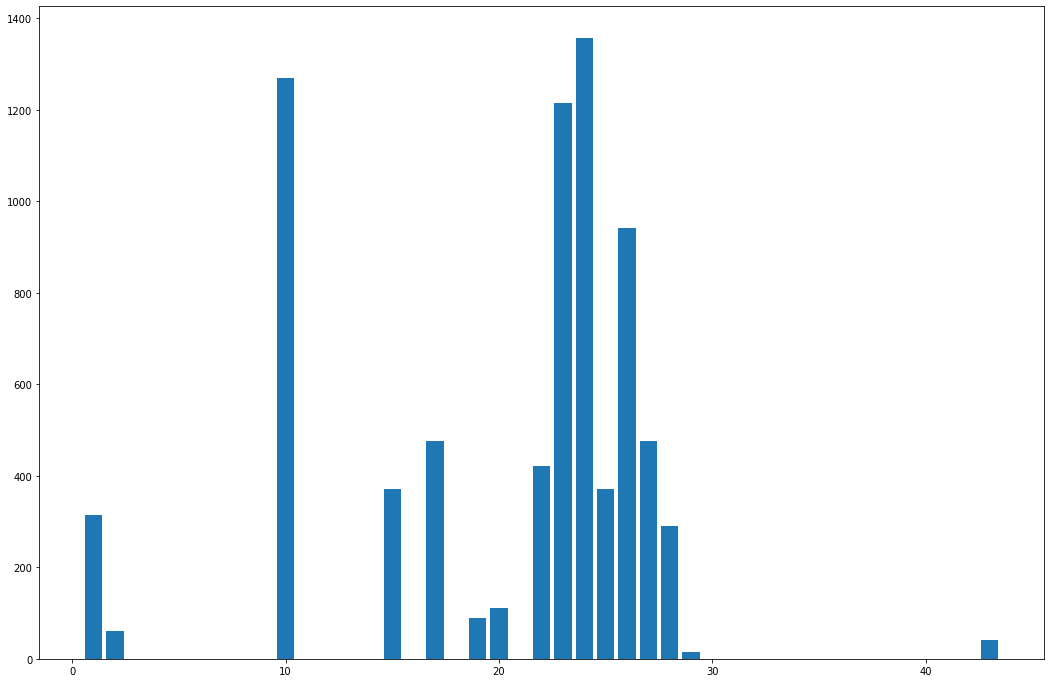

In [28]:
plt.figure(figsize=(18, 12))
plt.bar(df3["category_id"], df3["count"])

In [41]:
# Find the three tags per category with the highest 'RandomInt' values
df4 = df2.groupby('category_id').apply(lambda x: x.nlargest(50, 'views')).reset_index(drop=True)
                   
#top_tags = df2.groupby('category_id').apply(lambda x: x.nlargest(3, 'RandomInt')).reset_index(drop=True)

In [55]:
df4.head(100)
df4[df4["category_id"]==15]

,video_id,category_id,tags2,views
150,nWZMfPP34g8,15,adventure,6187457
151,nWZMfPP34g8,15,"""adventurous""",6187457
152,nWZMfPP34g8,15,"""animals""",6187457
153,nWZMfPP34g8,15,"""brave""",6187457
154,nWZMfPP34g8,15,"""brave wilderness""",6187457
155,nWZMfPP34g8,15,"""breaking""",6187457
156,nWZMfPP34g8,15,"""breaking trail""",6187457
157,nWZMfPP34g8,15,"""coyote""",6187457
158,nWZMfPP34g8,15,"""coyote peterson""",6187457
159,nWZMfPP34g8,15,"""coyotes backyard""",6187457


<BarContainer object of 48 artists>

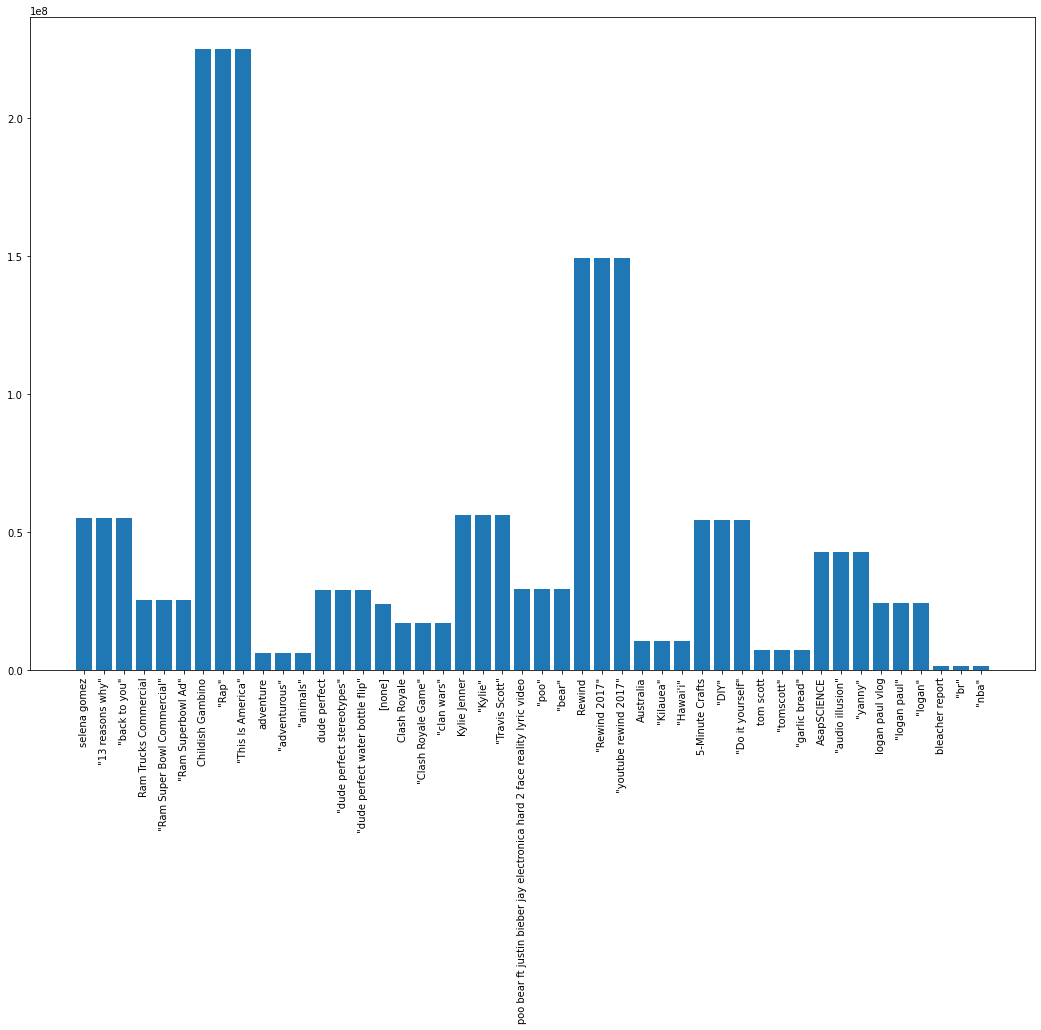

In [30]:
plt.figure(figsize=(18, 12))
plt.xticks(rotation=90)
plt.bar(df4["tags2"], df4["views"])

###### df4.to_csv("USvideos_top50tags_per_Category.csv", sep=";")
df2.to_csv("data_tableau_exploded.csv", sep=";")

In [71]:
with open('US_category_id.json') as f:
    d = json.load(f)
    print(d["title"])
    print(d)
    
df = pd.json_normalize(d['results'])

df = pd.json_normalize(d['results'])

df = pd.read_json('path/to/your/file.json')


KeyError: 'title'

In [122]:
fileNames = ['US_category_id.json', 
             'CA_category_id.json', 
             'JP_category_id.json', 
             'DE_category_id.json',
             'FR_category_id.json',
             'GB_category_id.json']

df.head(3)
df["items"][0]["snippet"]["title"]
#df["items"][0]["snippet"]["Country"]
#df.head(3)
len(df)
df.head(3)
df["items"]
df["items"][1]["id"]

In [199]:
dfMergedCategories = pd.DataFrame()
rowNumber = 0

for i in fileNames:
    df = pd.read_json(i)
    countryID = i[:2]
    for j in range(0, len(df)):
        newRow = pd.DataFrame({"Country": [countryID], 
                              "Category_id": [df["items"][j]["id"]],
                            "Category_Name": [df["items"][j]["snippet"]["title"]],
                              })
        # print(newRow)
        # dfMerged.append(newRow)
        if rowNumber == 0:
            dfMergedCategories = newRow
        else:
            dfMergedCategories = pd.concat([dfMergedCategories, newRow], axis=0) # ignore_index=True)
        #dfMerged = pd.concat([dfMerged, pd.DataFrame([newRow])], ignore_index=True)
        # print(newRow)
        #dfMerged.append(newRow)
        rowNumber += 1
        
#pd.DataFrame(dfMerged.reshape(2, -1), columns=cols)


In [200]:
newRow.shape
type(newRow)
dfMergedCategories.reset_index(drop=True)

dfMergedCategories['Country'] = dfMergedCategories['Country'].replace({'CA': 'Canada', 'US': 'United States','JP': 'Japan', 'DE': 'Germany', 'FR': 'France', 'GB': 'Great Britain'})
# dfMergedCategories["Country_Category"] = dfMergedCategories['Country'] + dfMergedCategories['Category_id']

# dfMergedCategories["Country_Category"] = dfMergedCategories['Country'].str.cat(dfMergedCategories['Category_id'], sep=' ++')
dfMergedCategories["Country_Category"] = dfMergedCategories['Country'] + " " + dfMergedCategories['Category_id'].astype(str)


In [246]:
dfMergedCategories.reset_index(drop=True)
dfMergedCategories.head

<bound method NDFrame.head of        Category_Name  Country_Category
0   Film & Animation   United States 1
0   Autos & Vehicles   United States 2
0              Music  United States 10
0     Pets & Animals  United States 15
0             Sports  United States 17
..               ...               ...
0     Sci-Fi/Fantasy  Great Britain 40
0           Thriller  Great Britain 41
0             Shorts  Great Britain 42
0              Shows  Great Britain 43
0           Trailers  Great Britain 44

[187 rows x 2 columns]>

In [273]:
dfMergedCategories.head()
dfMergedCategories = dfMergedCategories.drop(["Category_id", "Country"], axis=1)
dfMergedCategories.head()

,Category_Name,Country_Category
0,Film & Animation,United States 1
0,Autos & Vehicles,United States 2
0,Music,United States 10
0,Pets & Animals,United States 15
0,Sports,United States 17


        newRow = pd.DataFrame({"Country": countryID, 
                              "Category_id": df["items"][j]["id"],
                            "Category_Name": df["items"][j]["snippet"]["title"],
                              })

In [ ]:
# df['Country'] = df['Country'].replace({'CA': 'Canada', 'US': 'United States','JP': 'Japan', 'DE': 'Germany', 'FR': 'France', 'GB': 'Great Britain'})

In [275]:
dfCat = pd.merge(dfus, dfMergedCategories, how="left", on="Country_Category")

In [276]:
dfCat.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,description,Country,Country_Category,Category_Name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,Eminem|Walk|On|Water|Aftermath/Shady/Interscop...,17158579.0,787425.0,43420.0,125882.0,Eminem's new track Walk on Water ft. Beyoncé i...,Canada,Canada 10,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,plush|bad unboxing|unboxing|fan mail|idubbbztv...,1014651.0,127794.0,1688.0,13030.0,STill got a lot of packages. Probably will las...,Canada,Canada 23,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,racist superman|rudy|mancuso|king|bach|racist|...,3191434.0,146035.0,5339.0,8181.0,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Canada,Canada 23,Comedy


In [ ]:
plt.figure(figsize=(12, 8)) 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Create sample DataFrame
data = {'Column1': ['G', 'B', 'D', 'G', 'A', 'C', 'H', 'F', 'C', 'E', 'D', 'J', 'E', 'H', 'F', 'A', 'C', 'J', 'G', 'B', 'H', 'I', 'I', 'F', 'I', 'E', 'H', 'D', 'B', 'J'],
        'category_ids': [2, 3, 1, 3, 2, 1, 3, 3, 1, 2, 3, 2, 1, 3, 1, 2, 2, 1, 2, 1, 1, 1, 3, 1, 1, 2, 2, 3, 1, 3],
        'RandomInt': [7125, 4857, 5738, 1301, 4015, 8839, 9992, 5647, 6869, 3584, 2325, 1436, 2911, 7849, 4485, 8762, 1596, 5402, 3982, 2239, 2477, 6615, 5266, 1459, 5551, 7262, 3844, 8007, 8506, 2480]}
df = pd.DataFrame(data)

# Group by 'category_ids' and find the top three tags with the highest 'RandomInt'
top_tags = df.groupby('category_ids').apply(lambda x: x.nlargest(3, 'RandomInt')).reset_index(drop=True)

# Count the occurrences of the top tags per category
#tag_counts = top_tags.groupby(['category_ids', 'Column1']).size().unstack(fill_value=0)

# Merge the 'RandomInt' column from the original DataFrame
#result = pd.merge(tag_counts, df[['Column1', 'RandomInt']].drop_duplicates(), on='Column1', how='left')

# Plot the bar chart
#result.plot(kind='bar', stacked=True, x='Column1', legend=False)
#plt.xlabel('Category')
#plt.ylabel('Views')
#plt.title('Views per Tag by Category')
#plt.legend(title='Tag', bbox_to_anchor=(1, 1))
#plt.show()

# Print the final DataFrame
top_tags


,Column1,category_ids,RandomInt
0,C,1,8839
1,B,1,8506
2,C,1,6869
3,A,2,8762
4,E,2,7262
5,G,2,7125
6,H,3,9992
7,D,3,8007
8,H,3,7849


In [245]:

dfMergedCategories.head()

,Category_Name,Country_Category
0,Film & Animation,United States 1
0,Autos & Vehicles,United States 2
0,Music,United States 10
0,Pets & Animals,United States 15
0,Sports,United States 17


In [242]:
dfus.shape
dfus.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,description,Country_x,Country_Category,Country_y,Category_id,Category_Name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579.0,787425.0,43420.0,125882.0,Eminem's new track Walk on Water ft. Beyoncé i...,Canada,Canada 10,Canada,10,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651.0,127794.0,1688.0,13030.0,STill got a lot of packages. Probably will las...,Canada,Canada 23,Canada,23,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434.0,146035.0,5339.0,8181.0,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Canada,Canada 23,Canada,23,Comedy
